<a href="https://colab.research.google.com/github/ZuhairHossain/Psychological-Aspect-of-Cancer-Patients/blob/master/PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [705]:
import pandas as pd
import io
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import graphviz 
from sklearn import tree

In [706]:
df = pd.read_csv("https://raw.githubusercontent.com/ZuhairHossain/Psychological-Aspect-of-Cancer-Patients/master/labelled_data.csv")

pd.set_option('display.max_columns', None)
df.head()

,DataCollectionPlace,Age,Gender,Education,Profession,Religion,MaritalStatus,TotalChildCount,MonthlyEarning,CancerType,CancerStage,Operation,FamilyMemberCancer,FamMemSupport,HospitalFeesPaymentIssue,Loan,InternetUseForCancer,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,PHQ9,PHQ10,CancerInMyBody,PHQ9_Total,Depression_lvl
0,1,4,1,1,1,1,1,4,1,1,3,0,1,0,3,0,1,0,3,2,2,2,3,3,3,1,2,0,19,3
1,1,4,1,2,2,1,1,1,1,2,1,1,1,0,4,0,1,1,2,0,2,3,2,2,2,0,1,1,14,2
2,1,3,1,1,3,1,3,5,1,4,3,1,1,0,4,1,1,2,1,1,2,0,0,0,0,0,1,1,6,1
3,1,2,1,1,4,1,1,0,1,4,3,0,0,0,5,0,1,2,2,2,0,1,3,3,1,3,1,1,17,3
4,2,3,1,2,5,1,1,3,1,5,3,0,1,0,5,0,1,3,3,3,3,2,1,3,3,0,2,1,21,4


In [707]:
print(df.shape)
print(df.isnull().sum().sum())

(30, 30)
0


In [708]:
print(df.columns)

Index(['DataCollectionPlace', 'Age', 'Gender', 'Education', 'Profession',
       'Religion', 'MaritalStatus', 'TotalChildCount', 'MonthlyEarning',
       'CancerType', 'CancerStage', 'Operation', 'FamilyMemberCancer',
       'FamMemSupport', 'HospitalFeesPaymentIssue', 'Loan',
       'InternetUseForCancer', 'PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6',
       'PHQ7', 'PHQ8', 'PHQ9', 'PHQ10', 'CancerInMyBody', 'PHQ9_Total',
       'Depression_lvl'],
      dtype='object')


In [709]:
df2 = df.copy()

In [710]:
df2 = df2.drop(['Depression_lvl', 'Religion', 'PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8', 'PHQ9', 'PHQ10', 
                'InternetUseForCancer', 'Profession'], axis=1)

In [711]:
df2.describe()

,DataCollectionPlace,Age,Gender,Education,MaritalStatus,TotalChildCount,MonthlyEarning,CancerType,CancerStage,Operation,FamilyMemberCancer,FamMemSupport,HospitalFeesPaymentIssue,Loan,CancerInMyBody,PHQ9_Total
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.433333,2.633333,1.433333,2.866667,1.866667,2.233333,1.800000,7.133333,1.800000,0.600000,0.600000,0.133333,3.166667,0.700000,0.400000,12.566667
std,0.504007,1.098065,0.504007,1.833281,1.074255,1.906130,0.924755,3.501067,0.924755,0.498273,0.498273,0.345746,1.147211,0.466092,0.498273,4.811504
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,0.250000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,9.000000
50%,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,12.500000
75%,2.000000,3.750000,2.000000,4.000000,3.000000,3.750000,3.000000,9.750000,2.750000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,16.000000
max,2.000000,4.000000,2.000000,7.000000,4.000000,6.000000,3.000000,14.000000,3.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,21.000000


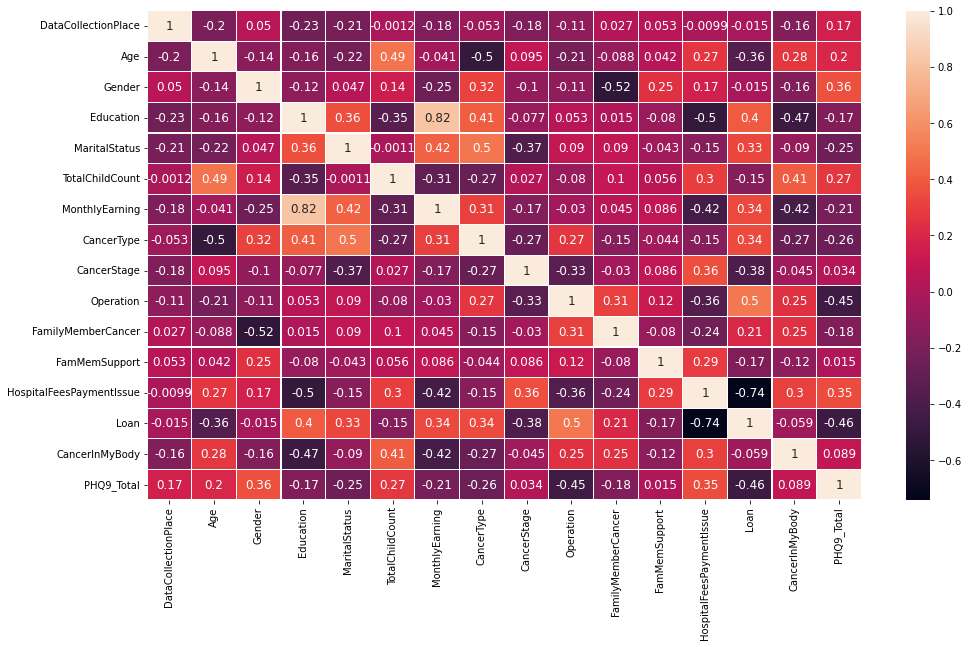

In [712]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(), annot=True, annot_kws={"size":12}, linewidths=.1)

In [713]:
x_data = df.copy()
x_data.columns

Index(['DataCollectionPlace', 'Age', 'Gender', 'Education', 'Profession',
       'Religion', 'MaritalStatus', 'TotalChildCount', 'MonthlyEarning',
       'CancerType', 'CancerStage', 'Operation', 'FamilyMemberCancer',
       'FamMemSupport', 'HospitalFeesPaymentIssue', 'Loan',
       'InternetUseForCancer', 'PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6',
       'PHQ7', 'PHQ8', 'PHQ9', 'PHQ10', 'CancerInMyBody', 'PHQ9_Total',
       'Depression_lvl'],
      dtype='object')

In [714]:
x_data = x_data.drop(['Depression_lvl', 'Religion', 'PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8', 'PHQ9', 'PHQ10', 
                'InternetUseForCancer', 'Profession'],axis=1)

In [715]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_data)
x_scaled = scaler.transform(x_data)

In [716]:
y_data = df['Depression_lvl']
y_data.head()

0    3
1    2
2    1
3    3
4    4
Name: Depression_lvl, dtype: int64

In [717]:
y_data.head()

0    3
1    2
2    1
3    3
4    4
Name: Depression_lvl, dtype: int64

In [718]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.2, random_state = 42)

In [719]:
print(x_train.shape)
print(x_test.shape)

(24, 16)
(6, 16)


In [720]:
print(y_train.shape)
print(y_test.shape)

(24,)
(6,)


#Decision Tree Classifier

In [721]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [722]:
#model = LogisticRegression()

# train the model
#model.fit(x_train, y_train)

In [723]:
#prediction = model.predict(x_test)

#logistic_regression_score = accuracy_score(y_test, prediction)
#print(logistic_regression_score)

In [724]:
clf = DecisionTreeClassifier(criterion='entropy', random_state = 42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
score_tree = accuracy_score(y_pred, y_test)
print(score_tree)

1.0


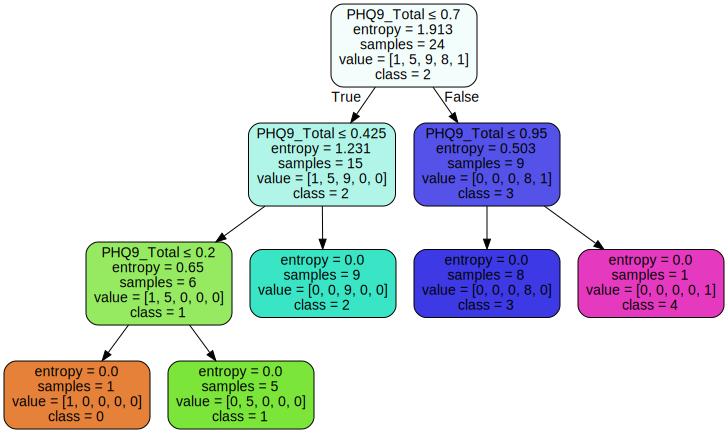

In [725]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=x_data.columns,  
                     class_names=['0','1','2','3','4'], 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [726]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
pre_pca_svc=svc.score(x_test, y_test)
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(pre_pca_svc))

Training accuracy of the model is 0.88
Testing accuracy of the model is 0.50


In [727]:
# Neural Network (Multilayer Perceptron Classifier)

from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)
pre_pca_mpc=nnc.score(x_test, y_test)
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(pre_pca_mpc))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.33


In [728]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
pre_pca_rfc=rfc.score(x_test, y_test)
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(pre_pca_rfc))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.17


In [729]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
principal_components= pca.fit_transform(x_scaled)
# x_df = pd.DataFrame(data=principal_components, columns=[f"col{i}" for i in range(11)])
#print(principal_components)
x_df = pd.DataFrame(data=principal_components)
#x_df.head()
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_df, y_data,test_size = .2, random_state=1)

In [730]:
#Support Vector Machine


from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train_pca, y_train_pca)
post_pca_svc=svc.score(x_test_pca, y_test_pca)
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train_pca, y_train_pca)))
print("Testing accuracy of the model is {:.2f}".format(post_pca_svc))

Training accuracy of the model is 0.79
Testing accuracy of the model is 0.50


In [731]:
# Neural Network (Multilayer Perceptron Classifier)

from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train_pca, y_train_pca)
post_pca_mpc=nnc.score(x_test_pca, y_test_pca)
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train_pca, y_train_pca)))
print("The Testing accuracy of the model is {:.2f}".format(post_pca_mpc))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.50


In [732]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train_pca, y_train_pca)
post_pca_rfc=rfc.score(x_test_pca, y_test_pca)
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train_pca, y_train_pca)))
print("The Testing accuracy of the model is {:.2f}".format(post_pca_rfc))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.50


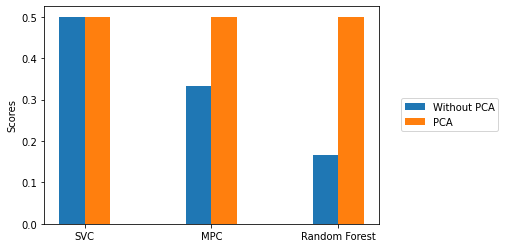

In [733]:
# Plotting accuracy

import matplotlib.pyplot as plt
import numpy as np
label = ["SVC", "MPC", "Random Forest"]
  
x = np.arange(3)
y1 = [pre_pca_svc, pre_pca_mpc, pre_pca_rfc]
y2 = [post_pca_svc, post_pca_mpc, post_pca_rfc]
width = 0.20
  
# plot data in grouped manner of bar type
plt.bar(x-0.1, y1, width)
plt.bar(x+0.1, y2, width)
plt.ylabel("Scores")
#plt.legend()
plt.xticks(x, label)
plt.legend(["Without PCA", "PCA"], bbox_to_anchor = (1.05, 0.6))
plt.show()